Question 1:

Technical indicators

In [857]:
#As my roll number is 250065 I will find the 3rd indicator in the given lists

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

BTC = yf.download("BTC-USD", start="2022-01-01", end="2025-01-01")
#As it was causing error as we were always getting dfs intead of series
BTC.columns = BTC.columns.get_level_values(0)
BTC.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_14164\457767765.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BTC = yf.download("BTC-USD", start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2022-01-01,47686.812500,47827.312500,46288.484375,46311.746094,24582667004
2022-01-02,47345.218750,47881.406250,46856.937500,47680.925781,27951569547
2022-01-03,46458.117188,47510.726562,45835.964844,47343.542969,33071628362
2022-01-04,45897.574219,47406.546875,45752.464844,46458.851562,42494677905
2022-01-05,43569.003906,46929.046875,42798.222656,45899.359375,36851084859


Momentum Indicator: Stochastic Oscillator

In [858]:
low_14 = BTC['Low'].rolling(window=14).min()
high_14 = BTC['High'].rolling(window=14).max()

BTC['%K'] = ((BTC['Close'] - low_14) / (high_14 - low_14)) * 100
BTC['%D'] = BTC['%K'].rolling(window=3).mean()
BTC['EMA_20'] = BTC['Close'].ewm(span=20).mean()

Volume Indicator: Accumulation & Distribution Line

In [859]:
mfm = ((BTC['Close'] - BTC['Low']) - (BTC['High'] - BTC['Close'])) / (BTC['High'] - BTC['Low'])
BTC['AD_Line'] = (mfm * BTC['Volume']).cumsum()

Volatility Indicator : VIX

In [860]:
VIX = yf.download("^VIX", start="2022-01-01", end="2025-01-01")

BTC['VIX'] = VIX['Close']
#As VIX is not applicable on weekends, we will extend the data of friday to saturday and sunday
BTC['VIX'] = BTC['VIX'].ffill()
BTC['VIX_Mean'] = BTC['VIX'].rolling(14).mean()
BTC.tail()

C:\Users\adity\AppData\Local\Temp\ipykernel_14164\3267944870.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  VIX = yf.download("^VIX", start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,%K,%D,EMA_20,AD_Line,VIX,VIX_Mean
Date,,,,,,,,,,,
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,12.363430,26.375486,97801.842291,1.288366e+12,15.95,17.212143
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,18.571433,17.810277,97550.612519,1.300928e+12,15.95,17.365000
2024-12-29,93530.226562,95174.875000,92881.789062,95174.054688,29635885267,8.419962,13.118275,97167.718619,1.288053e+12,15.95,17.517857
2024-12-30,92643.210938,94903.320312,91317.132812,93527.195312,56188003691,7.822864,11.604753,96736.813125,1.273419e+12,17.40,17.711429
2024-12-31,93429.203125,96090.601562,91914.031250,92643.250000,43625106843,13.937860,10.060229,96421.802649,1.261446e+12,17.35,17.817143


Question 2:

Design and implementation of The Trading Strategy

In [861]:
BTC['Buy'] = (
    ((BTC['%K'] > BTC['%D']) &                       
    (BTC['%K'] < 20) &                              # Over sold 
    (BTC['AD_Line'] > BTC['AD_Line'].shift(1)) &    # showing money is flowing in
    (BTC['VIX'] < BTC['VIX_Mean']))                 # considering market voltility
    )
        
BTC['Sell'] = (
    (BTC['%K'] < BTC['%D']) &                           # bearish momentum
    (BTC['%K'] > 60) &                                  # not too early
    (
    (BTC['AD_Line'] < BTC['AD_Line'].rolling(3).min()) |
    (BTC['Close'] < BTC['EMA_20'])                      # price weakness
    )
)
#As VIX is a volatility indicator, I have not used it for selling
BTC.tail()


Price,Close,High,Low,Open,Volume,%K,%D,EMA_20,AD_Line,VIX,VIX_Mean,Buy,Sell
Date,,,,,,,,,,,,,
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,12.363430,26.375486,97801.842291,1.288366e+12,15.95,17.212143,False,False
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,18.571433,17.810277,97550.612519,1.300928e+12,15.95,17.365000,True,False
2024-12-29,93530.226562,95174.875000,92881.789062,95174.054688,29635885267,8.419962,13.118275,97167.718619,1.288053e+12,15.95,17.517857,False,False
2024-12-30,92643.210938,94903.320312,91317.132812,93527.195312,56188003691,7.822864,11.604753,96736.813125,1.273419e+12,17.40,17.711429,False,False
2024-12-31,93429.203125,96090.601562,91914.031250,92643.250000,43625106843,13.937860,10.060229,96421.802649,1.261446e+12,17.35,17.817143,False,False


Testing

In [862]:
initial_capital = 100000
capital = initial_capital
position = 0
entry_price = 0

Total_Profit = 0
Total_Loss = 0
returns = []
in_position = []

for i in range(len(BTC)):
    price = BTC['Close'].iloc[i]

    if BTC['Buy'].iloc[i] and position == 0:
        position = capital / price
        entry_price = price
        stop_loss = entry_price * 0.98
        capital = 0

    elif position > 0:
        if price <= stop_loss or BTC['Sell'].iloc[i]:
            capital = position * price
            returns.append((price - entry_price) / entry_price)
            if entry_price >= price:
                Total_Loss += (entry_price - price) * position
            else:
                Total_Profit += (price - entry_price) * position
            
            position = 0
            
    in_position.append(1 if position > 0 else 0)          
             

if position > 0:
    final_price = BTC['Close'].iloc[-1]
    returns.append((final_price - entry_price) / entry_price)
    capital = position * final_price
    
    if final_price - entry_price > 0:
        Total_Profit += position * (final_price - entry_price)
    else:
        Total_Loss += abs(position * (final_price - entry_price))

    position = 0 
    
    
BTC['In_Position'] = in_position    
              
  

Performance Metrics

In [863]:
returns = pd.Series(returns)
rfr = 0.0452 #risk free rate
avg_trade_py = len(returns) / 3
rfr_per_trade = rfr_per_trade = rfr / avg_trade_py
excess_returns = returns - rfr_per_trade

sharpe_ratio = excess_returns.mean() / excess_returns.std()
sortino_ratio = excess_returns.mean() / returns[returns < 0].std()

cum_returns = (1 + returns).cumprod()
drawdown = (cum_returns - cum_returns.cummax()) / cum_returns.cummax()
max_drawdown = drawdown.min()

print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)
print("Maximum Drawdown:", max_drawdown)
print("\n")
print("Winning Trades:", (returns > 0).sum())
print("Losing Trades:", (returns < 0).sum())
print("Total Profit:", Total_Profit)
print("Net Profit:", capital - 100000)

Sharpe Ratio: 0.2030844403737507
Sortino Ratio: 4.554025833524607
Maximum Drawdown: -0.08675554629535602


Winning Trades: 2
Losing Trades: 5
Total Profit: 57237.12067325762
Net Profit: 39825.07892269088


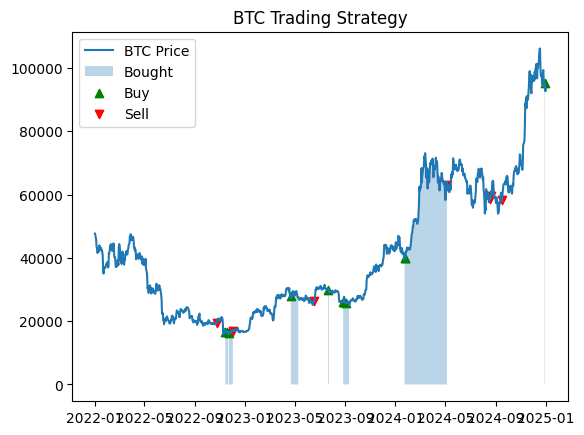

In [864]:
#For Visual aid
plt.plot(BTC.index, BTC['Close'],label='BTC Price')
plt.fill_between(BTC.index,BTC['Close'], where=BTC['In_Position'] == 1,label='Bought', alpha=0.3,)
plt.scatter(BTC.index[BTC['Buy']], BTC['Close'][BTC['Buy']], marker='^', color='green', label='Buy')
plt.scatter(BTC.index[BTC['Sell']], BTC['Close'][BTC['Sell']], marker='v', color='red', label='Sell')
plt.legend()
plt.title("BTC Trading Strategy")
plt.show()

## Strategy Explanation

In this trading strategy, We have analyzed the Bitcoin (BTC) daily price data using three technical indicators representing momentum, volume, and volatility. 

The Stochastic Oscillator is used as a momentum indicator to identify oversold and overbought conditions. A buy signal is generated whenever the %K line crosses above the %D line while it is still below the level of 20, indicating an oversold condition with improving momentum. A sell signal is generated when %K crosses below %D and is above the level of 60, indicating weakening momentum after a price rise.

The Accumulation and Distribution (A/D) Line is used as a volume indicator; trades are bought only when the A/D line is rising during buy signals, showing that buying pressure is supported by volume. We have used a rolling minimum of the A/D line over three days to confirm a continous selling pressure, which helps reduce false exits.

the VIX index is used volatility filter in which buy trades are allowed only when the current VIX value is below its rolling average, indicating relatively stable market conditions.

Once a buy signal is generated, the model enters a long position using the capital we currently have and then exits the position whenever a sell signal occurs or when a predefined stop-loss is hit.


#### Optional exercise

In [865]:
body = abs(BTC['Close'] - BTC['Open'])
lower_shadow = BTC[['Open', 'Close']].min(axis=1) - BTC['Low']
upper_shadow = BTC['High'] - BTC[['Open', 'Close']].max(axis=1)

In [866]:
BTC['Hammer'] = (
    (lower_shadow >= 2 * body) &             
    (upper_shadow <= 0.2 * body) &            
    (BTC['Close'] >= BTC['Open'])             
)
print("Number of Candles Identified:", BTC['Hammer'].sum())

Number of Candles Identified: 5


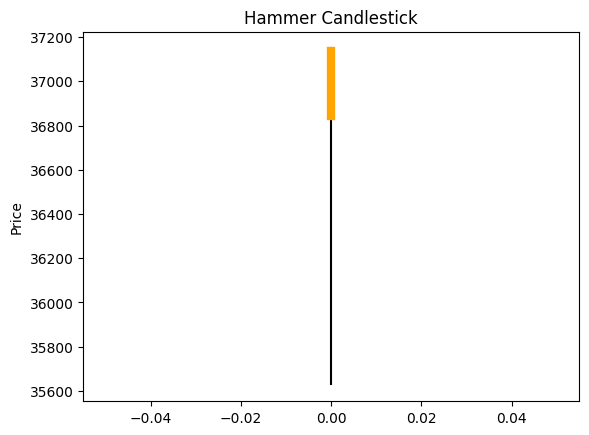

In [867]:
hammer_candle = BTC[BTC['Hammer']].iloc[0]
plt.plot([0, 0], [hammer_candle['Low'], hammer_candle['High']], color='black')
plt.plot([0, 0], [hammer_candle['Open'], hammer_candle['Close']], linewidth=6, color='orange')
plt.title("Hammer Candlestick")
plt.ylabel("Price")
plt.show()